In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
file_path = '/content/drive/MyDrive/flood_risk_dataset_india.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

    Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465433    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184   

In [4]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Rainfall (mm),0
Temperature (°C),0
Humidity (%),0
River Discharge (m³/s),0
Water Level (m),0
Elevation (m),0
Land Cover,0
Soil Type,0


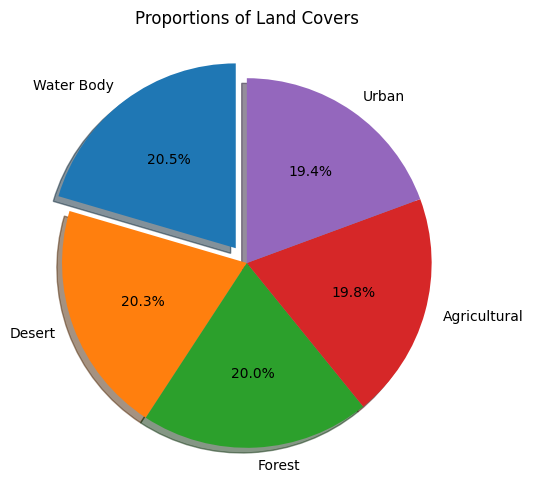

In [5]:
dflandcover=df['Land Cover']

count=dflandcover.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Land Covers')
plt.show()

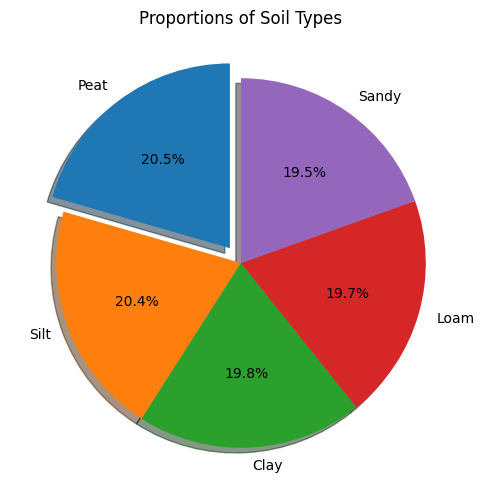

In [6]:
dfsoil=df['Soil Type']

count=dfsoil.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Soil Types')
plt.show()

<Axes: title={'center': 'Correlation Map'}>

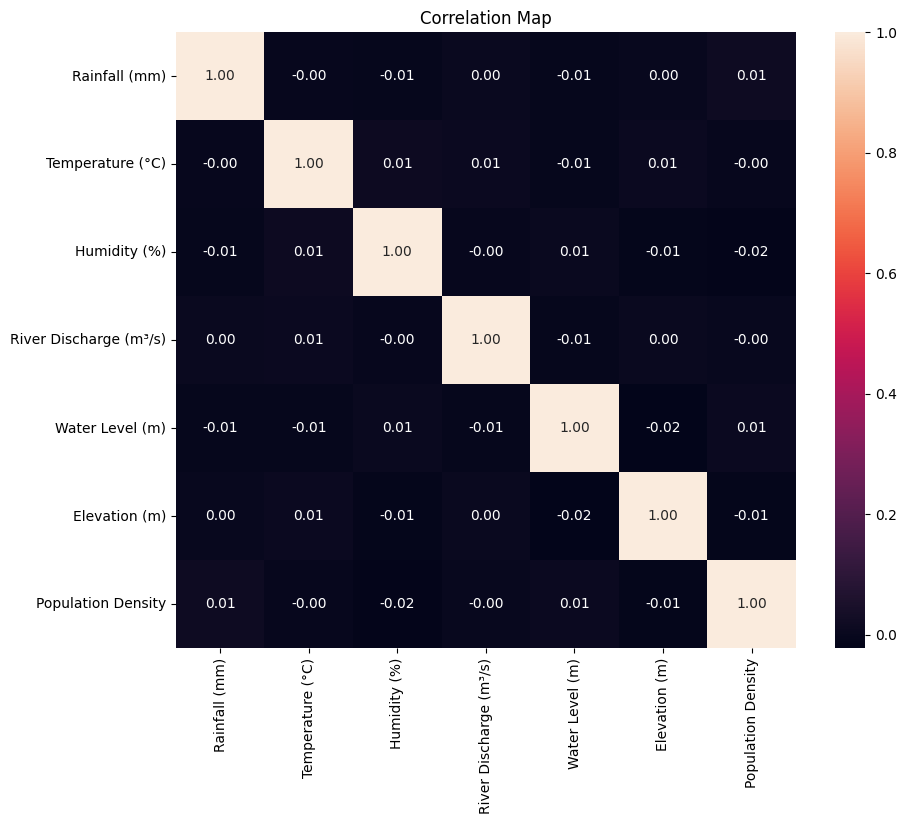

In [7]:
number = df[['Rainfall (mm)','Temperature (°C)','Humidity (%)','River Discharge (m³/s)','Water Level (m)','Elevation (m)','Population Density']]
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(number.corr(),annot=True, fmt='.2f')

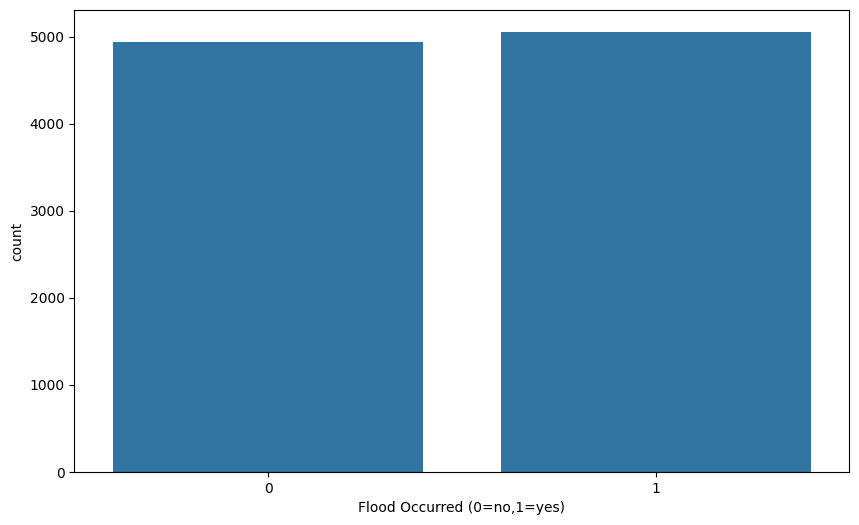

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Flood Occurred',data=df)
plt.xlabel('Flood Occurred (0=no,1=yes)')
plt.show()

In [9]:
df_encoded = pd.get_dummies(df, columns=['Land Cover', 'Soil Type'])

X = df_encoded.drop(columns=['Flood Occurred', 'Latitude', 'Longitude'])
y = df_encoded['Flood Occurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))

Accuracy: 51.15%
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       966
           1       0.53      0.52      0.52      1034

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [12]:
print("Map Of All Places Where Floods Occured and The Precipitation is Higher Than 200 mm")
precipitation_threshold = 200

high_precipitation_data = df[(df['Rainfall (mm)'] > precipitation_threshold) & (df['Flood Occurred'] == 1)]


map_center = [high_precipitation_data['Latitude'].mean(), high_precipitation_data['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5)

marker_cluster = MarkerCluster().add_to(my_map)

for _, row in high_precipitation_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Rainfall: {row['Rainfall (mm)']} mm, Temp: {row['Temperature (°C)']} °C, Humidity: {row['Humidity (%)']}%, Water Level: {row['Water Level (m)']}, Elevation: {row['Elevation (m)']}"
    ).add_to(marker_cluster)

my_map

Map Of All Places Where Floods Occured and The Precipitation is Higher Than 200 mm
